
<a id="overview"></a>

# Predicting Stock Price Movement


## Overview
It's your first day at RedBoulder, the globe's preeminent financial institution. On your first day, you are assigned to design an algorithm to predict the movement of the equity, [Twilio, Inc](https://finance.yahoo.com/quote/TWLO/). You are given two datasets:

1. Price / volume data for the month of August 2019
2. Twitter data for the month of August 2019. This dataset includes every single tweet posted in that month that includes the cashtag `$TWLO`

In this project, you will be tasked with importing, cleaning, visualizing, and analyzing market data for Twilio, Inc. (TWLO). Your goal is to predict how the price is likely to move in short intervals. To do so, you'll be  comparing market data to trends ascertained from sentiment data collected on Twitter.


**Expected Time to complete: 5-10 hours**

## Objectives

This assignment will provide you with a chance to:

- Use `pandas` to read in CSV files.
- Practice core `pandas` functionality such as `merge`, filtering, etc.
- Graph trends to determine insights with `matplotlib`.
- Clean and structure stock price prediction data to forecast demand.


## Problem

Your task is to set up the data and ascertain signals that correlate to stock price movement. You'll be answering questions, such as:

- What is the volatility of our data within 30 minute windows?
- Can we predict price movement within 2 hours with a degree of accuracy better than random chance?

> Hint: This assignment works extensively with financial terminology. If you need a refresher, [click here](https://www.investopedia.com/insights/digging-deeper-bull-and-bear-markets/).

## Structure

This notebook walks through Pythonic data analysis in different stages: 

- **Required:** This section covers classroom topics from recent units. These are _required_. 
- **Advanced:** This section covers upcoming topics. These are _optional_.

Throughout the notebook, you will see clearly labeled sections._You must provide answers to all of the questions in the **Required** section._ Some questions have been further divided up into "Part 1", "Part 2", (etc) in order to break down the steps of sequential logic used in Python programming. Please attempt answers for all parts.

For those of you who wish to work ahead or want to come back later for more practice, the **Advanced** section offers additional prompts that will extend your analysis. This section is optional; you do not need to complete these for submission; however, depending on the discretion of your section instructor, these questions may be completed for bonus points.


## Instructions

1. Open the assignment notebook. 
1. Save a copy of your notebook and retitle it: "yourname_assignment.ipynb"
1. Attempt answers for all **Required questions**. Some questions can be solved in many different ways!
1. Include at least one comment per question explaining your logic or approach. To include a comment in your Python code, use the `#` sign.
1. Make sure to include all work within your Jupyter notebook.
1. Submit answers for the **Required questions** to your instructional team by the due date.
1. Have fun!

## Data

Our dataset includes two CSV files: `twlo.csv` and `tweets.csv`.

- `Twlo.csv` includes price / volume data for the month of August 2019.
- `Tweets.csv` includes Twitter data for the month of August 2019, pulling in every single tweet posted that month which included the tag `$TWLO`.


1. Within `twlo.csv`, you'll see the following columns:

    - date - the date of the stock market data point (by the minute)
    - close - the closing price
    - high - high for the minute
    - low - low for the minute
    - open - opening price
    - volume - trading volume at that minute
    

2. In `tweets.csv`, you'll find:

    - text - the text of all tweets containing the tag `$TWLO`
    - `tweet_unique_id` - twittter's unique id for the tweet
    - `date_tweeted` - the date that tweet was posted
    - `author_handle` - handle for the author
    - `author_id` - unique id for the author
    - `author_verified` - boolean, whether or not the author is "Twitter verified"
    - `num_followers` - How many followers the author has
    - `num_following` - How many people the author follows
  

---
### Setting up our Environment

In [1]:
# Import our libraries for data manipulation and plotting:

import datetime
import pytz
import pandas as pd
from matplotlib import style
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/twlo.csv')

In [3]:
print(data)

                           date       close        high         low  \
0     2019-08-01 13:30:00+00:00  139.990005  139.990005  139.990005   
1     2019-08-01 13:31:00+00:00  138.970001  141.500000  138.970001   
2     2019-08-01 13:32:00+00:00  139.360001  140.000305  138.710007   
3     2019-08-01 13:33:00+00:00  140.809998  140.839996  138.759995   
4     2019-08-01 13:34:00+00:00  139.999893  140.820007  139.703506   
...                         ...         ...         ...         ...   
8388  2019-08-30 19:55:00+00:00  130.369995  130.369995  130.009995   
8389  2019-08-30 19:56:00+00:00  130.429993  130.479996  130.350006   
8390  2019-08-30 19:57:00+00:00  130.580002  130.619995  130.369995   
8391  2019-08-30 19:58:00+00:00  130.460007  130.519897  130.429993   
8392  2019-08-30 19:59:00+00:00  130.470001  130.500000  130.419998   

            open    volume  
0     139.990005  196282.0  
1     139.704300   75698.0  
2     140.000305   90875.0  
3     139.500000   76913.0  
4 

------------------

# REQUIRED / GRADED
> **Required:** This section covers classroom topics from class and is _required_. 

Begin your analysis by analyzing the data with Pandas. 

Ready, set, go!


---

## Question 1

Change the index to be the `date` column [and use `tz_convert`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.tz_convert.html) to convert the dates to Eastern timezone (they are currently in UTC).

In [4]:
#using datetime library to use tx_convert to convert it to the Eastern timezone
data.index = pd.to_datetime(data['date'])
data.index = data.index.tz_convert('US/Eastern')
print(data.index)

DatetimeIndex(['2019-08-01 09:30:00-04:00', '2019-08-01 09:31:00-04:00',
               '2019-08-01 09:32:00-04:00', '2019-08-01 09:33:00-04:00',
               '2019-08-01 09:34:00-04:00', '2019-08-01 09:35:00-04:00',
               '2019-08-01 09:36:00-04:00', '2019-08-01 09:37:00-04:00',
               '2019-08-01 09:38:00-04:00', '2019-08-01 09:39:00-04:00',
               ...
               '2019-08-30 15:50:00-04:00', '2019-08-30 15:51:00-04:00',
               '2019-08-30 15:52:00-04:00', '2019-08-30 15:53:00-04:00',
               '2019-08-30 15:54:00-04:00', '2019-08-30 15:55:00-04:00',
               '2019-08-30 15:56:00-04:00', '2019-08-30 15:57:00-04:00',
               '2019-08-30 15:58:00-04:00', '2019-08-30 15:59:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='date', length=8393, freq=None)


---

## Question 2

Use pandas plot to plot the closing price as a line graph over the entire month of August. Include a title for the graph.

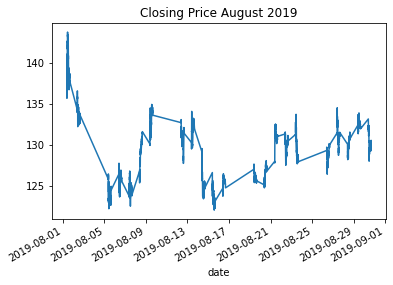

In [5]:
#taking the column 'close' and calling the functio line to create the lien graph over the month of August 2019
#that's the the title key
data['close'].plot.line(title='Closing Price August 2019')

---

## Question 3

Use Matplotlib (not built in pandas plotting) to plot two graphs on top of one another:

- **Part 1**. The top graph should be the closing price plotted over the entire month (same as the last question)
- **Part 2**. The bottom graph should be the volume as a bar chart

> Hint: If you want to customize your plots, [check out the documentation for `style.use`](https://matplotlib.org/3.1.1/api/style_api.html?highlight=style%20use#matplotlib.style.use). [Click here for further inspiration](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

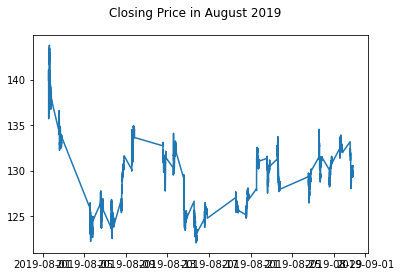

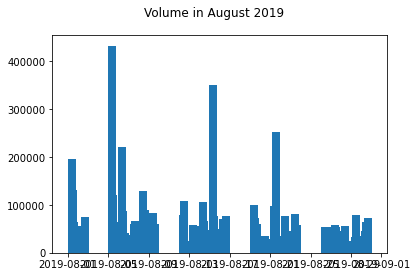

In [6]:
#using .plot using the column 'close' for the parameters
plt.plot(data['close'])
#title for the line graph
plt.suptitle('Closing Price in August 2019')
#showing/printing the graph
plt.show()
#using the function .bar to create a bar graph. Indexing the data and extracting the volume column
plt.bar(data.index, data['volume'])
#title for the bar graph
plt.suptitle('Volume in August 2019')
#showing/printing the bar graph
plt.show()

---

## Question 4

Use pandas' [rolling method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) to calculate the rolling standard deviation and rolling mean with 30 minute windows for the "close" and "volume" columns.

> Hint: Some cells will be empty because there isn't any data from the last 30 minutes for early trading minutes. This is ok!

In [7]:
#calling the rolling function- specifying the time and minutes per period in the parameters for the function
#using .mean at the end to calculate the average
print('Closing Rolling Mean:\n', data['close'].rolling('30min',min_periods=30).mean(), '\n')
print('Closing Rolling Standard Dev:\n', data['close'].rolling('30min',min_periods=30).std(), '\n')
#calling the rolling function- specifying the time and minutes per period in the parameters for the function
#using .mean at the end to calculate the standard deviation
print('Volume Rolling Mean:\n', data['volume'].rolling('30min',min_periods=30).mean(), '\n')
print('Volume Rolling Standard Dev:\n', data['volume'].rolling('30min',min_periods=30).std(), '\n')

Closing Rolling Mean:
 date
2019-08-01 09:30:00-04:00           NaN
2019-08-01 09:31:00-04:00           NaN
2019-08-01 09:32:00-04:00           NaN
2019-08-01 09:33:00-04:00           NaN
2019-08-01 09:34:00-04:00           NaN
                                ...    
2019-08-30 15:55:00-04:00           NaN
2019-08-30 15:56:00-04:00           NaN
2019-08-30 15:57:00-04:00    129.678949
2019-08-30 15:58:00-04:00    129.703616
2019-08-30 15:59:00-04:00    129.730783
Name: close, Length: 8393, dtype: float64 

Closing Rolling Standard Dev:
 date
2019-08-01 09:30:00-04:00         NaN
2019-08-01 09:31:00-04:00         NaN
2019-08-01 09:32:00-04:00         NaN
2019-08-01 09:33:00-04:00         NaN
2019-08-01 09:34:00-04:00         NaN
                               ...   
2019-08-30 15:55:00-04:00         NaN
2019-08-30 15:56:00-04:00         NaN
2019-08-30 15:57:00-04:00    0.308710
2019-08-30 15:58:00-04:00    0.340075
2019-08-30 15:59:00-04:00    0.367504
Name: close, Length: 8393, dtype: 

---

### Tutorial

The **[Coefficient of Variation](https://en.wikipedia.org/wiki/Coefficient_of_variation)** provides a standardized measure of dispersion that gives some insight into the volatility of day to day trading.

---

## Question 5

Calculate the rolling "Coefficient of Variation" (calculated as the `rolling std / rolling mean`) with a window of 60 minutes for each column.

> Remember, some cells will be empty because there isn't any data from the last 30 minutes for early trading minutes. This is ok!

In [8]:
#calling the rolling function to data- specifying 60 minutes to be calculated in the parameter
#using std function to calculation and dividing it by the rolling data code to get the mean 
print(data.rolling('60min', min_periods=60).std()/data.rolling('60min', min_periods=60).mean())

                           close  high  low  open  volume
date                                                     
2019-08-01 09:30:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-01 09:31:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-01 09:32:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-01 09:33:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-01 09:34:00-04:00    NaN   NaN  NaN   NaN     NaN
...                          ...   ...  ...   ...     ...
2019-08-30 15:55:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-30 15:56:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-30 15:57:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-30 15:58:00-04:00    NaN   NaN  NaN   NaN     NaN
2019-08-30 15:59:00-04:00    NaN   NaN  NaN   NaN     NaN

[8393 rows x 5 columns]


---

### Tutorial

In [9]:
# Great, now let's import the twitter data!

tweets = pd.read_csv('data/twlo_tweets.csv')

tweets.head()

,text,tweet_unique_id,author_handle,author_id,author_verified,date_tweeted,num_followers,num_following
0,"RT @HedgeMind: $TWLO's hype growth continues, ...",1156719610433015808,AshwinMaddi,57757815,False,2019-08-01 00:13:40+00:00,191,548
1,"Blog Post: ""Burn It to the Ground""\n\nhttps://...",1156719981083729923,JohnBonini,23892061,False,2019-08-01 00:15:08+00:00,390,688
2,$TWLO Twilio Inc. Class A Commo #LeaderPullBac...,1156721339325177856,stockmktgenius,914214567152160768,False,2019-08-01 00:20:32+00:00,597,58
3,Jeff Lawson (Twilio $TWLO Founder &amp; CEO) i...,1156727135530360834,newmoneyFC,3278201701,False,2019-08-01 00:43:34+00:00,1437,201
4,"RT @EvanKenty: $TWLO Regained all AH drop, sho...",1156727777195958280,j_p_jacques,31173813,False,2019-08-01 00:46:07+00:00,1344,1780


---

## Question 6

Change the index of `tweets` to be the `date_tweeted` column and use [tz_convert](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.tz_convert.html) to convert the dates to Eastern timezone (they are currently all in UTC)

In [10]:
#indexing the tweets to get the date time and then indexing it again to get the correct timezone
tweets.index = pd.to_datetime(tweets['date_tweeted'])
tweets.index = tweets.index.tz_convert('US/Eastern')
print(tweets.index)

DatetimeIndex(['2019-07-31 20:13:40-04:00', '2019-07-31 20:15:08-04:00',
               '2019-07-31 20:20:32-04:00', '2019-07-31 20:43:34-04:00',
               '2019-07-31 20:46:07-04:00', '2019-07-31 20:47:42-04:00',
               '2019-07-31 21:11:24-04:00', '2019-07-31 21:15:58-04:00',
               '2019-07-31 21:25:18-04:00', '2019-07-31 21:29:01-04:00',
               ...
               '2019-08-31 16:43:11-04:00', '2019-08-31 16:43:11-04:00',
               '2019-08-31 16:44:34-04:00', '2019-08-31 17:10:01-04:00',
               '2019-08-31 17:13:20-04:00', '2019-08-31 17:59:57-04:00',
               '2019-08-31 17:59:58-04:00', '2019-08-31 17:59:58-04:00',
               '2019-08-31 18:13:19-04:00', '2019-08-31 18:15:40-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='date_tweeted', length=1814, freq=None)


---

## Question 7

- **Part 1**: Show the tweets that contain the word `bull` in it
- **Part 2**: Show a bar chart showing the number of tweets that come out by the hour of the day

> Hint: There should be 24 bars, each bar showing how many tweets came out at that hour over the entire month.

In [11]:
#indexing 'text' column in the dataframe tweets to use for the function str.containts in order to extract the world 'bull'
#saving it in a variable to print
bull_tweets = tweets[tweets['text'].str.contains(pat='bull')]
print(bull_tweets)

                                                                        text  \
date_tweeted                                                                   
2019-08-01 01:35:21-04:00  Prepare for the next bullmarket !\n$CNDT $SEND...   
2019-08-01 01:59:48-04:00  RT @GrandSuperCycle: Prepare for the next bull...   
2019-08-01 10:29:10-04:00  RT @Stocktwits: Twilio $TWLO has 25,000 total ...   
2019-08-02 21:00:31-04:00  RT @bullriders1: $TWLO 133.55 https://t.co/yxF...   
2019-08-03 02:26:24-04:00  RT @nobullshitplzok: @jeffcotrupe @zoom_us Yea...   
2019-08-05 15:49:04-04:00  @OphirGottlieb $TWLO bulls even more pist - wh...   
2019-08-07 10:39:08-04:00                  $TWLO bullish candle for the day!   
2019-08-10 18:14:18-04:00  Stocks that look to lead the next bull market ...   
2019-08-10 20:50:24-04:00  RT @GBaller: Stocks that look to lead the next...   
2019-08-10 21:54:25-04:00  RT @GBaller: Stocks that look to lead the next...   
2019-08-13 10:00:23-04:00  $AYX  \n \nHo

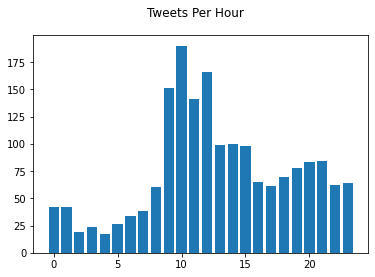

In [12]:
#using groupby for the dataframe tweets to be able to group by the hour using lambda since lambda can take any argument
tweet_count_by_hour = tweets.groupby(by=lambda date: date.hour).count()
plt.bar(tweet_count_by_hour.index, tweet_count_by_hour['text'])
plt.suptitle('Tweets Per Hour')
plt.show()

------------------

# ADVANCED 

> **Advanced:** This section covers upcoming topics from future units. These questions are _optional_. 

So far, you've learned to work with Pandas to analyze data... but there's still a lot more to be done!

The following questions are NOT required for submission; however, they will help you expand your analysis. In the next section, we'll deepen our analysis by comparing training and test data and then building a decision tree classifier.

> Hint: If you feel like proceeding, we recommend that you spend some time with the documentation for [ScikitLearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

---

### Tutorial

In [13]:
# Let's add a column called `minute`, which will be the `date_tweeted` column rounded to the nearest minute:

tweets['minute'] = tweets.index.round(freq='1T')
tweets.head(2)

,text,tweet_unique_id,author_handle,author_id,author_verified,date_tweeted,num_followers,num_following,minute
date_tweeted,,,,,,,,,
2019-07-31 20:13:40-04:00,"RT @HedgeMind: $TWLO's hype growth continues, ...",1156719610433015808,AshwinMaddi,57757815,False,2019-08-01 00:13:40+00:00,191,548,2019-07-31 20:14:00-04:00
2019-07-31 20:15:08-04:00,"Blog Post: ""Burn It to the Ground""\n\nhttps://...",1156719981083729923,JohnBonini,23892061,False,2019-08-01 00:15:08+00:00,390,688,2019-07-31 20:15:00-04:00


In [14]:
# Now we'll reate a DataFrame that groups the "tweets" DataFrame by the minute, then counts the number of tweets, 
# and sums the number of people (collectively) who were the audience for tweets at that minute!

tweet_count_by_minute = tweets.groupby('minute').agg({'num_followers': 'sum', 'tweet_unique_id': 'count'})

tweet_count_by_minute.head()

,num_followers,tweet_unique_id
minute,,
2019-07-31 20:14:00-04:00,191,1
2019-07-31 20:15:00-04:00,390,1
2019-07-31 20:21:00-04:00,597,1
2019-07-31 20:44:00-04:00,1437,1
2019-07-31 20:46:00-04:00,1344,1


---

## Question 8

- **Part 1** - Merge the `tweet_count_by_minute` DataFrame into our working data using `pandas.merge`, [making sure to fill any missing data with a 0](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

- **Part 2** - Next, [use pandas.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) to add a new column called `price_change_in_two_hours`, which should return the closing price 120 minutes from the given row.

In [15]:
#merge data and tweet_count_by_minute on indexes
data = data.merge(tweet_count_by_minute, how='left', left_index=True, right_index=True)
#fill na with 0
data = data.fillna(value=0)

data.head(10)

,date,close,high,low,open,volume,num_followers,tweet_unique_id
date,,,,,,,,
2019-08-01 09:30:00-04:00,2019-08-01 13:30:00+00:00,139.990005,139.990005,139.990005,139.990005,196282.0,0.0,0.0
2019-08-01 09:31:00-04:00,2019-08-01 13:31:00+00:00,138.970001,141.500000,138.970001,139.704300,75698.0,0.0,0.0
2019-08-01 09:32:00-04:00,2019-08-01 13:32:00+00:00,139.360001,140.000305,138.710007,140.000305,90875.0,4210.0,1.0
2019-08-01 09:33:00-04:00,2019-08-01 13:33:00+00:00,140.809998,140.839996,138.759995,139.500000,76913.0,35745.0,1.0
2019-08-01 09:34:00-04:00,2019-08-01 13:34:00+00:00,139.999893,140.820007,139.703506,140.800003,58998.0,0.0,0.0
2019-08-01 09:35:00-04:00,2019-08-01 13:35:00+00:00,140.639999,140.740005,139.500000,139.999893,48063.0,0.0,0.0
2019-08-01 09:36:00-04:00,2019-08-01 13:36:00+00:00,140.060806,141.190002,140.000000,140.599899,69906.0,0.0,0.0
2019-08-01 09:37:00-04:00,2019-08-01 13:37:00+00:00,140.443802,140.970001,140.000000,140.000000,39693.0,0.0,0.0
2019-08-01 09:38:00-04:00,2019-08-01 13:38:00+00:00,140.794998,141.169998,140.429993,140.524994,46321.0,93.0,1.0


In [16]:
#adding column 'price_change_in_two_hours' and using shift function to return 120 min(need to use freq= in parameter)
data['price_change_in_two_hours'] = data.shift(freq='-120T')['close'] - data['close']
data.head(10)

,date,close,high,low,open,volume,num_followers,tweet_unique_id,price_change_in_two_hours
date,,,,,,,,,
2019-08-01 09:30:00-04:00,2019-08-01 13:30:00+00:00,139.990005,139.990005,139.990005,139.990005,196282.0,0.0,0.0,3.279999
2019-08-01 09:31:00-04:00,2019-08-01 13:31:00+00:00,138.970001,141.500000,138.970001,139.704300,75698.0,0.0,0.0,4.459900
2019-08-01 09:32:00-04:00,2019-08-01 13:32:00+00:00,139.360001,140.000305,138.710007,140.000305,90875.0,4210.0,1.0,3.990097
2019-08-01 09:33:00-04:00,2019-08-01 13:33:00+00:00,140.809998,140.839996,138.759995,139.500000,76913.0,35745.0,1.0,2.619995
2019-08-01 09:34:00-04:00,2019-08-01 13:34:00+00:00,139.999893,140.820007,139.703506,140.800003,58998.0,0.0,0.0,NaN
2019-08-01 09:35:00-04:00,2019-08-01 13:35:00+00:00,140.639999,140.740005,139.500000,139.999893,48063.0,0.0,0.0,2.408203
2019-08-01 09:36:00-04:00,2019-08-01 13:36:00+00:00,140.060806,141.190002,140.000000,140.599899,69906.0,0.0,0.0,3.281296
2019-08-01 09:37:00-04:00,2019-08-01 13:37:00+00:00,140.443802,140.970001,140.000000,140.000000,39693.0,0.0,0.0,3.056198
2019-08-01 09:38:00-04:00,2019-08-01 13:38:00+00:00,140.794998,141.169998,140.429993,140.524994,46321.0,93.0,1.0,2.714996


## ---

## Question 9

Now let's add a column to `data` called `will_go_up_in_two_hours_category` that should be either: 
- `Bearish` (if `will_go_up_in_two_hours_category < 0`) or 
- `Bullish` (if `will_go_up_in_two_hours_category > 0`)


When you're done, the value counts of the column should read:

```

>>> data['will_go_up_in_two_hours_category'].value_counts()

Bearish    2868
Bullish    2790
Name: will_go_up_in_two_hours_category, dtype: int64

```

In [17]:
#adding bins
bins = [-7, 0, 7]
#labeling 
labels = ["Bearish", "Bullish"]
#adding columns to the data & slicing/cutting the column 'price_change_in_two_hours' with bins and labels
data['will_go_up_in_two_hours_category'] = pd.cut(data['price_change_in_two_hours'], bins, labels=labels)
#getting the count for the columns
data['will_go_up_in_two_hours_category'].value_counts()

Bearish    2869
Bullish    2789
Name: will_go_up_in_two_hours_category, dtype: int64

---

## Question 10

Create the following columns and add them to the `data` DataFrame:

1. `feature__30_min_rolling_close` - 30 min rolling mean for close
2. `feature__60_min_rolling_close` - 60 min rolling mean for close
3. `feature__60_min_rolling_volume` - 60 min rolling mean for volume
4. `feature__60_min_rolling_tweet_followers` - 60 min rolling mean for `num_followers`
5. `feature__60_min_rolling_tweets_count` - 60 min rolling mean for `tweet_unique_id`

Remember, our goal is to use these signals to predict the movement of the stock price at every given minute!

In [18]:
#creating columns and adding to the dataframe. Using rolling function to get the 30 minute average for that column
data["feature__30_min_rolling_close"] = data['close'].rolling('30T').mean()
#creating columns and adding to the dataframe. Using rolling function to get the 60 minute average for that column
data["feature__60_min_rolling_close"] = data['close'].rolling('60T').mean()
#creating columns and adding to the dataframe. Using rolling function to get the 60 minute average for that column
data["feature__60_min_rolling_volume"] = data['volume'].rolling('60T').mean()
data["feature__60_min_rolling_tweet_followers"] = data['num_followers'].rolling('60T').mean()
#creating columns and adding to the dataframe. Using rolling function to get the 60 minute average for that column
data["feature__60_min_rolling_tweets_count"] = data['tweet_unique_id'].rolling('60T').mean()

---

### Tutorial

In [19]:
# Create a new DataFrame called `prediction_df` that only selects rows with even hours or at the 30 minute mark:
prediction_df = data[(data.index.minute == 30) & (data.index.hour % 2 == 0)].copy()

# Remove rows with missing values:
prediction_df.dropna(inplace=True)

# Show the first five rows:
prediction_df.head()

,date,close,high,low,open,volume,num_followers,tweet_unique_id,price_change_in_two_hours,will_go_up_in_two_hours_category,feature__30_min_rolling_close,feature__60_min_rolling_close,feature__60_min_rolling_volume,feature__60_min_rolling_tweet_followers,feature__60_min_rolling_tweets_count
date,,,,,,,,,,,,,,,
2019-08-01 10:30:00-04:00,2019-08-01 14:30:00+00:00,139.899994,140.490005,139.690002,140.380005,59803.0,0.0,0.0,3.009903,Bullish,137.881154,138.113057,45934.898305,15061.355932,0.644068
2019-08-01 12:30:00-04:00,2019-08-01 16:30:00+00:00,142.909897,142.909897,142.664993,142.664993,6050.0,0.0,0.0,-5.409790,Bearish,142.303178,142.591419,11936.305085,5296.000000,0.322034
2019-08-02 10:30:00-04:00,2019-08-02 14:30:00+00:00,135.009995,135.294601,135.000000,135.294601,7083.0,0.0,0.0,-0.939987,Bearish,135.645647,135.462765,16376.733333,57.416667,0.066667
2019-08-02 12:30:00-04:00,2019-08-02 16:30:00+00:00,134.070007,134.070007,134.005798,134.035202,3844.0,0.0,0.0,-1.110001,Bearish,133.640690,133.981997,7825.644068,0.000000,0.000000
2019-08-05 10:30:00-04:00,2019-08-05 14:30:00+00:00,123.716003,123.769997,123.459999,123.769997,19254.0,0.0,0.0,0.605400,Bullish,124.556061,124.602685,51030.183333,746.033333,0.383333


---

## Question 11

Now, create two new DataFrames, `training` and `testing` where:

1. `training` is every row in `prediction_df` with dates before 8/20/2019
1. `testing` is every row in `prediction_df` with dates on or after 8/20/2019

Our goal is to investigate how our signals interact with our prediction column (e.g. "Bullish vs Bearish") on the DataFrame `training`. We want to see if those hypotheses pan out for our testing set. This will test our algorithms' ability to work on data it hasn't seen before!

In [20]:
cutoffDate = datetime.datetime(2019, 8, 20, 0, 0, 0, 0, pytz.UTC)
#creating new dataframe for training using loc to seperate cuttoff and the prediction_df
training = prediction_df.loc[prediction_df.index < cutoffDate]
#creating new dataframe for testing using loc to seperate cuttoff and the prediction_df
testing = prediction_df.loc[prediction_df.index >= cutoffDate]
training.tail(5)

,date,close,high,low,open,volume,num_followers,tweet_unique_id,price_change_in_two_hours,will_go_up_in_two_hours_category,feature__30_min_rolling_close,feature__60_min_rolling_close,feature__60_min_rolling_volume,feature__60_min_rolling_tweet_followers,feature__60_min_rolling_tweets_count
date,,,,,,,,,,,,,,,
2019-08-15 12:30:00-04:00,2019-08-15 16:30:00+00:00,123.980003,123.989998,123.812302,123.812302,4857.0,0.0,0.0,-1.200005,Bearish,124.213833,123.928686,5046.100000,16.250000,0.066667
2019-08-16 10:30:00-04:00,2019-08-16 14:30:00+00:00,125.150002,125.250000,125.139999,125.150002,7173.0,0.0,0.0,0.689995,Bullish,125.126637,124.912837,11759.741379,14.741379,0.086207
2019-08-16 12:30:00-04:00,2019-08-16 16:30:00+00:00,125.839996,125.839996,125.730003,125.820000,2437.0,0.0,0.0,-0.299995,Bearish,125.863330,125.828636,3060.448276,1150.396552,0.068966
2019-08-19 10:30:00-04:00,2019-08-19 14:30:00+00:00,125.820000,125.820000,125.598900,125.598900,7522.0,0.0,0.0,0.250000,Bullish,126.028936,126.561683,14074.568966,33.793103,0.068966
2019-08-19 12:30:00-04:00,2019-08-19 16:30:00+00:00,126.070000,126.102402,126.070000,126.102402,908.0,0.0,0.0,-0.300003,Bearish,126.127487,126.261147,3986.650000,25.350000,0.050000


In [21]:
testing.head(5)

,date,close,high,low,open,volume,num_followers,tweet_unique_id,price_change_in_two_hours,will_go_up_in_two_hours_category,feature__30_min_rolling_close,feature__60_min_rolling_close,feature__60_min_rolling_volume,feature__60_min_rolling_tweet_followers,feature__60_min_rolling_tweets_count
date,,,,,,,,,,,,,,,
2019-08-20 10:30:00-04:00,2019-08-20 14:30:00+00:00,125.959999,126.155998,125.822502,126.050003,6784.0,0.0,0.0,1.480804,Bullish,125.655922,125.496835,6078.631579,121.280702,0.070175
2019-08-20 12:30:00-04:00,2019-08-20 16:30:00+00:00,127.440804,127.440804,127.440804,127.440804,1063.0,0.0,0.0,-0.560806,Bearish,127.216455,126.965553,4541.693878,43.081633,0.081633
2019-08-21 10:30:00-04:00,2019-08-21 14:30:00+00:00,132.159195,132.159195,132.029999,132.029999,5606.0,0.0,0.0,-0.069199,Bearish,131.542555,130.956074,17343.474576,796.254237,0.305085
2019-08-21 12:30:00-04:00,2019-08-21 16:30:00+00:00,132.089996,132.089996,132.000000,132.020004,6500.0,0.0,0.0,-1.035004,Bearish,132.198824,132.271586,4054.508475,347.440678,0.101695
2019-08-22 10:30:00-04:00,2019-08-22 14:30:00+00:00,129.005005,129.130005,128.890106,129.117996,11376.0,0.0,0.0,-0.350006,Bearish,130.011372,130.552855,9936.500000,46.482759,0.068966


---

### Tutorial

In [22]:
# Let's see which of our potential signals correlate to the column `price_change_in_two_hours`.

# We'll use `pandas.filter` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)
# to limit our selections only to the specific columns with the word "feature" in them:
training.corr()['price_change_in_two_hours'].filter(regex='feature')

feature__30_min_rolling_close             -0.250416
feature__60_min_rolling_close             -0.253074
feature__60_min_rolling_volume             0.234880
feature__60_min_rolling_tweet_followers    0.149310
feature__60_min_rolling_tweets_count       0.118097
Name: price_change_in_two_hours, dtype: float64

In [23]:
# Interesting, `feature__60_min_rolling_close` and `feature__60_min_rolling_volume` seem to be very correlated!

# Let's further isolate the training data into two different DataFrames; 
# one for "bullish" training points and another for "bearish" training points:

bullish = training[training['will_go_up_in_two_hours_category'] == 'Bullish'] 
bearish = training[training['will_go_up_in_two_hours_category'] == 'Bearish'] 


---

## Question 12

Use Matplotlib to create two scatter plots in the same figure, where:

1. The x axis is the `feature__60_min_rolling_close` column of "bullish/bearish" and the y axis is `feature__60_min_rolling_volume`.
2. Color the bullish points **green** and the bearish points **red**.
3. Size the dots so that the larger they are, the more the price moved (i.e. large red dots means large price drop and vice versa).
3. Include a title and legend!

> Hint: For help creating legends, [check out Matplotlib's documentation](https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html).

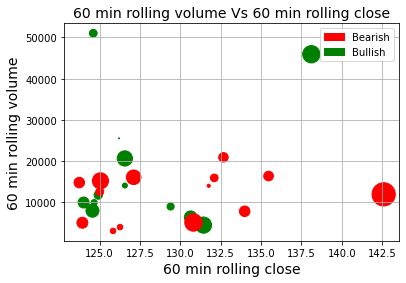

In [24]:
#creating x, y axis columns, and creating a scatter plot for bullish. Adding parameters to scatter plot for green and red ponts & labels 
plt.scatter(bullish["feature__60_min_rolling_close"], bullish["feature__60_min_rolling_volume"], s=bullish['price_change_in_two_hours']*100 , color='green', label="Bullish")
#creating x, y axis columns, and creating a scatter plot for bearish. Adding parameters to scatter plot for green and red ponts & labels 
plt.scatter(bearish["feature__60_min_rolling_close"], bearish["feature__60_min_rolling_volume"], s=(bearish['price_change_in_two_hours']*-1)*100, color='red', label="Bearish")
#creating a title 
plt.title('60 min rolling volume Vs 60 min rolling close' , fontsize=14)
#labeling the x axis
plt.xlabel('60 min rolling close', fontsize=14)
#labeing the y axis
plt.ylabel('60 min rolling volume', fontsize=14)
plt.grid(True)
#using function patch to make the fonts/labels in bearish and bulling the same size as the dots
red_patch = mpatches.Patch(color='red', label='Bearish')
green_patch = mpatches.Patch(color='green', label='Bullish')
#creating the legend
plt.legend(handles=[red_patch, green_patch])
#print/showing the scatter plot
plt.show()